In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
np.set_printoptions(suppress=True)
import deepl_model
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0

## Load Data

In [2]:
import deepl_data_preproc

In [3]:
CSV_DATA_PATH = "../data/downloaded_data/data.csv"

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test, y = deepl_data_preproc.read_data_n_preproc(data_csv_path=CSV_DATA_PATH, test_split=0.1, validation_split=0.1, verbose=True )

Splitting X and y of shapes (994000, 6) and (994000, 4)
============== Data Info. ==============
=> Read CSV with 994000 entries
=> Input/X data has shape  (4970, 200, 6)
=> Output/y data has shape  (4970, 4)
----------------------------------------
=> Training Input has shape  (4025, 200, 6)
=> Training Output has shape  (4025, 4)
----------------------------------------
=> Validation Input has shape  (448, 200, 6)
=> Validation Output has shape  (448, 4)
----------------------------------------
=> Testing Input has shape  (497, 200, 6)
=> Testing Output has shape  (497, 4)


In [5]:
y.value_counts()

Activity_andar  Activity_bicicleta  Activity_correr  Activity_repouso
1               0                   0                0                   463000
0               1                   0                0                   266000
                0                   0                1                   201000
                                    1                0                    64000
dtype: int64

In [6]:
pd.DataFrame(y_train).value_counts()

0  1  2  3
1  0  0  0    1875
0  1  0  0    1077
   0  0  1     814
      1  0     259
dtype: int64

In [7]:
pd.DataFrame(y_val).value_counts()

0  1  2  3
1  0  0  0    209
0  1  0  0    120
   0  0  1     90
      1  0     29
dtype: int64

In [8]:
pd.DataFrame(y_test).value_counts()

0  1  2  3
1  0  0  0    231
0  1  0  0    133
   0  0  1    101
      1  0     32
dtype: int64

## Use the Deep Learning Model

In [9]:
import deepl_model

In [10]:
model = deepl_model.DLModel(model_name="FinalModelV1")
model.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input-Layer (InputLayer)     [(None, 200, 6, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               614912    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832 

### Fitting the training data

In [11]:
model.train(X_train, y_train, X_val, y_val, epochs=200, batch_size=16, stop_early=True)

Epoch 1/200
252/252 [==============================] - 4s 10ms/step - loss: 0.7883 - accuracy: 0.6780 - val_loss: 0.4186 - val_accuracy: 0.8750

Epoch 00001: val_loss improved from inf to 0.41857, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 2/200
252/252 [==============================] - 2s 8ms/step - loss: 0.4803 - accuracy: 0.8286 - val_loss: 0.3232 - val_accuracy: 0.8571

Epoch 00002: val_loss improved from 0.41857 to 0.32323, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 3/200
252/252 [==============================] - 2s 8ms/step - loss: 0.3671 - accuracy: 0.8785 - val_loss: 0.2904 - val_accuracy: 0.8884

Epoch 00003: val_loss improved from 0.32323 to 0.29042, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 4/200
252/252 [==============================] - 2s 8ms/step - loss: 0.3267 - accuracy: 0.8909 - val_loss: 0.2416 - val_accuracy: 0.9174

Epoch 00004: val_loss improved from 0.29042 to 0.24156, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 5/200
252/252 [==============================] - 2s 8ms/step - loss: 0.3042 - accuracy: 0.8959 - val_loss: 0.2385 - val_accuracy: 0.9241

Epoch 00005: val_loss improved from 0.24156 to 0.23848, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 6/200
252/252 [==============================] - 2s 8ms/step - loss: 0.2799 - accuracy: 0.9001 - val_loss: 0.2075 - val_accuracy: 0.9286

Epoch 00006: val_loss improved from 0.23848 to 0.20750, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 7/200
252/252 [==============================] - 2s 9ms/step - loss: 0.2434 - accuracy: 0.9143 - val_loss: 0.2319 - val_accuracy: 0.9263

Epoch 00007: val_loss did not improve from 0.20750
Epoch 8/200
252/252 [==============================] - 2s 9ms/step - loss: 0.2472 - accuracy: 0.9165 - val_loss: 0.2031 - val_accuracy: 0.9330

Epoch 00008: val_loss improved from 0.20750 to 0.20314, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 9/200
252/252 [==============================] - 2s 8ms/step - loss: 0.2319 - accuracy: 0.9237 - val_loss: 0.1971 - val_accuracy: 0.9375

Epoch 00009: val_loss improved from 0.20314 to 0.19705, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 10/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1999 - accuracy: 0.9319 - val_loss: 0.1820 - val_accuracy: 0.9464

Epoch 00010: val_loss improved from 0.19705 to 0.18201, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 11/200
252/252 [==============================] - 2s 8ms/step - loss: 0.2114 - accuracy: 0.9255 - val_loss: 0.1933 - val_accuracy: 0.9420

Epoch 00011: val_loss did not improve from 0.18201
Epoch 12/200
252/252 [==============================] - 2s 7ms/step - loss: 0.2082 - accuracy: 0.9260 - val_loss: 0.1678 - val_accuracy: 0.9420

Epoch 00012: val_loss improved from 0.18201 to 0.16776, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 13/200
252/252 [==============================] - 2s 8ms/step - loss: 0.2015 - accuracy: 0.9297 - val_loss: 0.1677 - val_accuracy: 0.9420

Epoch 00013: val_loss improved from 0.16776 to 0.16774, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 14/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1802 - accuracy: 0.9406 - val_loss: 0.1565 - val_accuracy: 0.9531

Epoch 00014: val_loss improved from 0.16774 to 0.15650, saving model to saved_models\FinalModelV1


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 15/200
252/252 [==============================] - 2s 10ms/step - loss: 0.1718 - accuracy: 0.9401 - val_loss: 0.1806 - val_accuracy: 0.9375

Epoch 00015: val_loss did not improve from 0.15650
Epoch 16/200
252/252 [==============================] - 3s 10ms/step - loss: 0.1712 - accuracy: 0.9416 - val_loss: 0.1775 - val_accuracy: 0.9442

Epoch 00016: val_loss did not improve from 0.15650
Epoch 17/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1799 - accuracy: 0.9394 - val_loss: 0.1692 - val_accuracy: 0.9420

Epoch 00017: val_loss did not improve from 0.15650
Epoch 18/200
252/252 [==============================] - 2s 8ms/step - loss: 0.1857 - accuracy: 0.9414 - val_loss: 0.1944 - val_accuracy: 0.9442

Epoch 00018: val_loss did not improve from 0.15650
Epoch 19/200
252/252 [==============================] - 2s 8ms/step - loss: 0.1470 - accuracy: 0.9508 - val_loss: 0.1790 - val_accuracy: 0.9397

Epoch 00019: val_loss did not improve from 0.15650
Epoch 20/200
252/2

INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 23/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1315 - accuracy: 0.9588 - val_loss: 0.1644 - val_accuracy: 0.9464

Epoch 00023: val_loss did not improve from 0.15017
Epoch 24/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1405 - accuracy: 0.9516 - val_loss: 0.1742 - val_accuracy: 0.9598

Epoch 00024: val_loss did not improve from 0.15017
Epoch 25/200
252/252 [==============================] - 2s 8ms/step - loss: 0.1423 - accuracy: 0.9545 - val_loss: 0.1839 - val_accuracy: 0.9554

Epoch 00025: val_loss did not improve from 0.15017
Epoch 26/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1494 - accuracy: 0.9501 - val_loss: 0.1565 - val_accuracy: 0.9531

Epoch 00026: val_loss did not improve from 0.15017
Epoch 27/200
252/252 [==============================] - 2s 8ms/step - loss: 0.1381 - accuracy: 0.9580 - val_loss: 0.1331 - val_accuracy: 0.9643

Epoch 00027: val_loss improved from 0.15017 to 0.13308, saving model to

INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 28/200
252/252 [==============================] - 3s 10ms/step - loss: 0.1411 - accuracy: 0.9543 - val_loss: 0.1636 - val_accuracy: 0.9509

Epoch 00028: val_loss did not improve from 0.13308
Epoch 29/200
252/252 [==============================] - 2s 8ms/step - loss: 0.1285 - accuracy: 0.9540 - val_loss: 0.1710 - val_accuracy: 0.9576

Epoch 00029: val_loss did not improve from 0.13308
Epoch 30/200
252/252 [==============================] - 2s 8ms/step - loss: 0.1313 - accuracy: 0.9560 - val_loss: 0.1828 - val_accuracy: 0.9442

Epoch 00030: val_loss did not improve from 0.13308
Epoch 31/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1278 - accuracy: 0.9568 - val_loss: 0.1528 - val_accuracy: 0.9598

Epoch 00031: val_loss did not improve from 0.13308
Epoch 32/200
252/252 [==============================] - 2s 9ms/step - loss: 0.1150 - accuracy: 0.9620 - val_loss: 0.1437 - val_accuracy: 0.9576

Epoch 00032: val_loss did not improve from 0.13308
Epoch 33/200
252/25

INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


INFO:tensorflow:Assets written to: saved_models\FinalModelV1\assets


Epoch 40/200
252/252 [==============================] - 3s 12ms/step - loss: 0.0691 - accuracy: 0.9752 - val_loss: 0.1344 - val_accuracy: 0.9732

Epoch 00040: val_loss did not improve from 0.12970
Epoch 41/200
252/252 [==============================] - 3s 12ms/step - loss: 0.0741 - accuracy: 0.9779 - val_loss: 0.1427 - val_accuracy: 0.9643

Epoch 00041: val_loss did not improve from 0.12970
Epoch 42/200
252/252 [==============================] - 3s 10ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.1477 - val_accuracy: 0.9665

Epoch 00042: val_loss did not improve from 0.12970
Epoch 43/200
252/252 [==============================] - 2s 9ms/step - loss: 0.0651 - accuracy: 0.9816 - val_loss: 0.1343 - val_accuracy: 0.9665

Epoch 00043: val_loss did not improve from 0.12970
Epoch 44/200
252/252 [==============================] - 2s 8ms/step - loss: 0.0697 - accuracy: 0.9764 - val_loss: 0.1544 - val_accuracy: 0.9732

Epoch 00044: val_loss did not improve from 0.12970
Epoch 45/200
252/

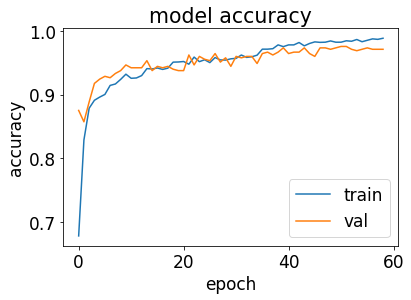

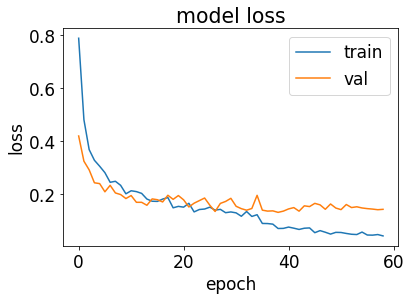

In [12]:
model.plot_training_history()
model.save()

### Evaluate performance on testing data

In [13]:
# Once saved, the model can be loaded from storage and used to make predictions
#model.load()
loaded_model = deepl_model.DLModel("FinalModelV1")


In [14]:
loaded_model.load("saved_models/FinalModelV1.h5")

In [15]:
print(loaded_model.model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input-Layer (InputLayer)     [(None, 200, 6, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               614912    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832 

In [16]:
loaded_model.evaluate(X_test, y_test, batch_size=1)

497/497 [==============================] - 3s 5ms/step - loss: 0.1168 - accuracy: 0.9738


[0.11680727452039719, 0.9738430380821228]

In [17]:
preds = loaded_model.predict_test(X_test)

In [18]:

# Confusion matrix for actual and predicted values.
matrix = confusion_matrix(y_test.argmax(axis=1),preds.argmax(axis=1))

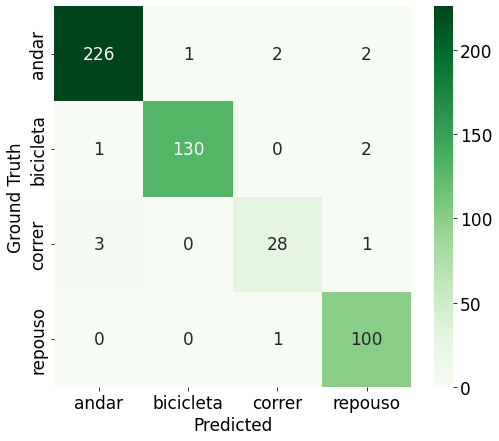

In [19]:
plt.figure(figsize=(8, 7))
labels = ['andar', 'bicicleta', 'correr', 'repouso']
ax = sns.heatmap(matrix, annot=True, fmt="g", xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()